## Regression model with PyTorch

### Forest Fire dataset. The aim is to predict the burned area based on meteorological conditions and other data.

In [1]:
import numpy as np
import pandas as pd
import torch
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import DataLoader, TensorDataset, random_split
import torch.nn as nn
import torch.nn.functional as F

In [2]:
plt.style.use('seaborn')

In [3]:
datapath = os.path.join(os.getcwd(), 'forestfires.csv')

In [4]:
df = pd.read_csv(datapath)

### Explore the data

In [5]:
# let's inspect the data
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [6]:
df.shape

(517, 13)

The dataframe has 517 rows and 13 columns, 'area' is a target column. Other columns are numerical and categorical.

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: 'jan' to 'dec'
4. day - day of the week: 'mon' to 'sun'
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3
7. DC - DC index from the FWI system: 7.9 to 860.6
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84


This is a regression task.

In [7]:
df.describe()
# ['FFMC','temp','RH','wind','rain'

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [8]:
# compute correlation 
corr = df.corr()

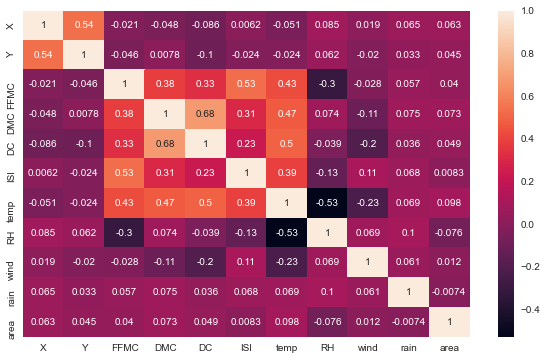

In [9]:
fig, ax = plt.subplots(figsize = (10, 6))

sns.heatmap(corr, annot=True)
plt.show()

'FFMC', 'DMC', 'DC', 'ISI', 'temp' are correlated, but the correlation is not strong.

Let's see correlation between target and feature columns

In [10]:
# compute correlation 
corr_target = df.corr()['area'].sort_values(ascending = False)

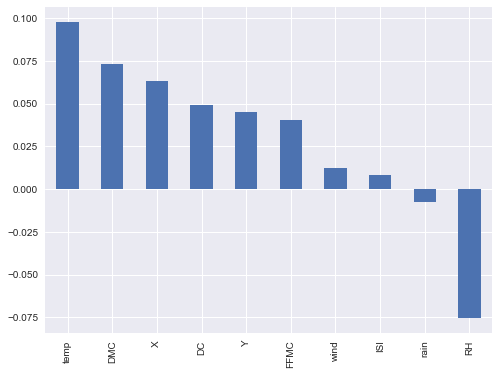

In [11]:
fig, ax = plt.subplots(figsize = (8, 6))
corr_target.drop('area').plot.bar(ax)
plt.show()

RH - relative humidity has negative correlation, it makes sense. The highest positive correlations are with temperature that means the higher the temperature, the more probability for fire to occur.